# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read in CSV

In [2]:
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_012_health_indicators_BRFSS2015.csv'

The Diabetes_012 column is our outcome variable, which means we'll be using classification instead of regression.

In [ ]:
db = db.drop_duplicates(keep='first', ignore_index=True)
db.isna().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

There aren't any NA values in our dataset.

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Plot of Outcome Variable Counts')

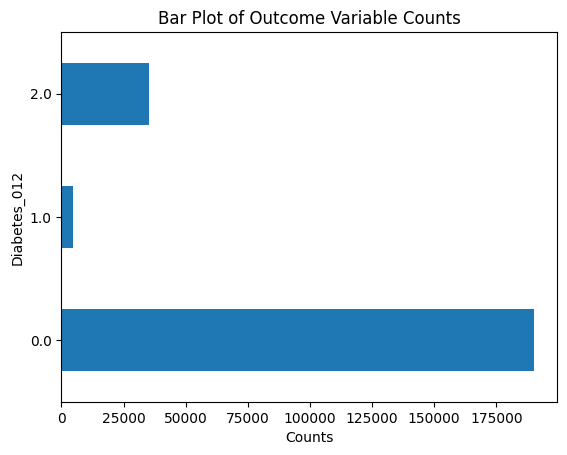

In [ ]:
counts = db['Diabetes_012'].value_counts()
print(counts)
counts.sort_index().plot(kind='barh', xlabel="Counts")
plt.title("Bar Plot of Outcome Variable Counts")

We have an unbalanced dataset, so we remove the prediabetes group (since there's so few observations compared to the other groups). Since '1' used to represent prediabetes, we now change the diabetes group to be represented by '1'.  Afterwards, we balance the dataset by keeping all the diabetes observations, but only randomly select from the no diabetes group. Our dataset was quite large originally, so we decided we could work with just a subset of the data. 

In [ ]:
db = db[db["Diabetes_012"] != 1] # drop prediabetes
db['Diabetes_012'] = db['Diabetes_012'].replace(2,1)

In [ ]:
i_keep_0 = db[db['Diabetes_012'] == 0].sample(n=db['Diabetes_012'].value_counts()[1],
                                   replace=False,
                                   random_state=1).index

# all indices to keep
i_keep_all = db[db['Diabetes_012'] == 1].index.append(i_keep_0).sort_values()

In [ ]:
db = db.loc[i_keep_all].reset_index(drop=True)

Diabetes_012
0.0    35097
1.0    35097
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Plot of New Outcome Variable Counts')

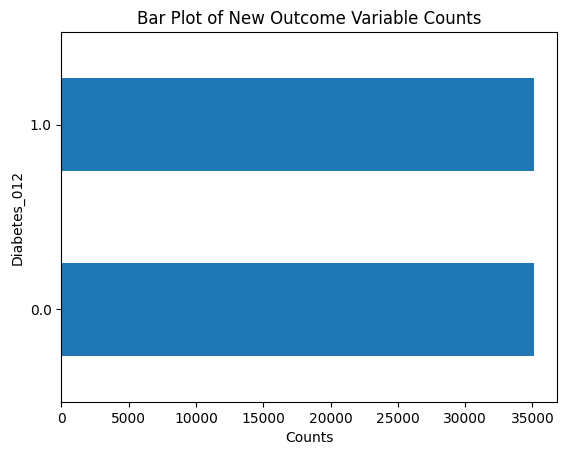

In [ ]:
counts = db['Diabetes_012'].value_counts()
print(counts)
counts.sort_index().plot(kind='barh',xlabel="Counts")
plt.title("Bar Plot of New Outcome Variable Counts")

Now, we have a balanced dataset. Our new dataset still has enough people in each group, specifically 35097 people, for a total of 70194 people. We will use this dataset moving forward. '0' represents no diabetes and '1' represents diabetes. 

# Exploratory Data Analysis

Based on reading the documentation for the dataset, we found this split of columns that are numerical versus categorical:  

Categorical variables:  
HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex, Age, Education, Income  

Numerical variables:  
BMI, MentHlth, PhysHlth  

## Primary Analysis of Categorical Variables

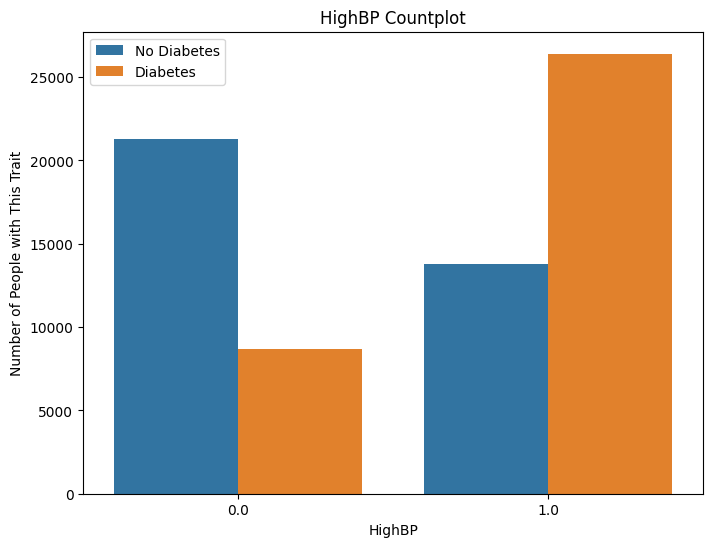

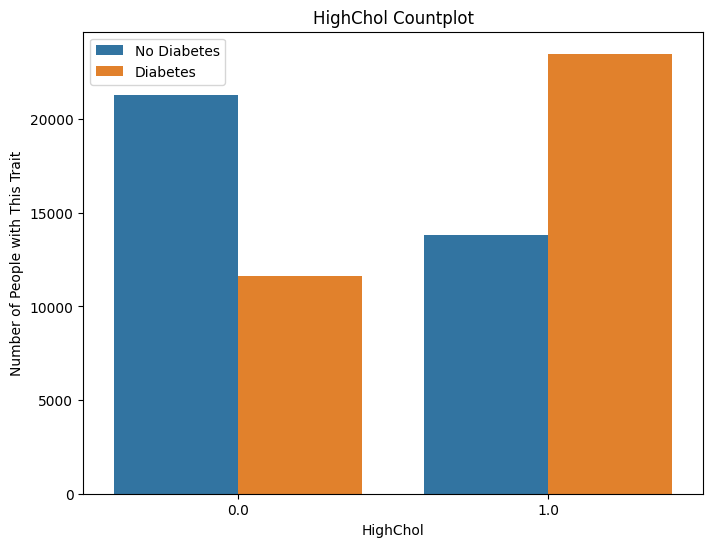

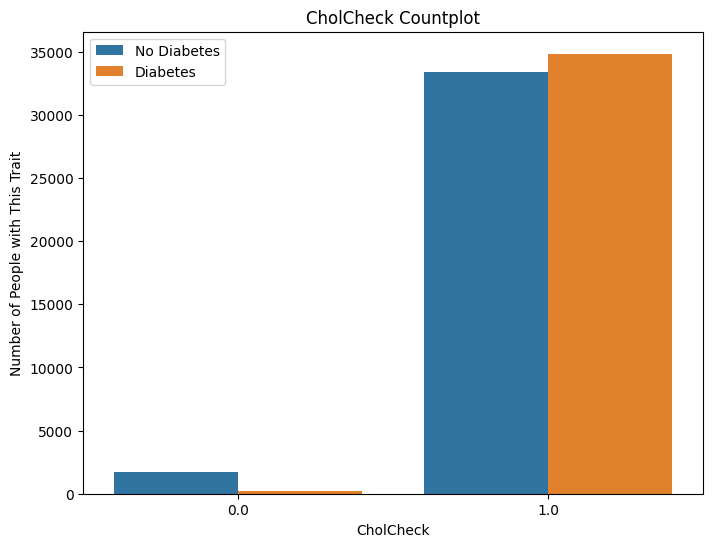

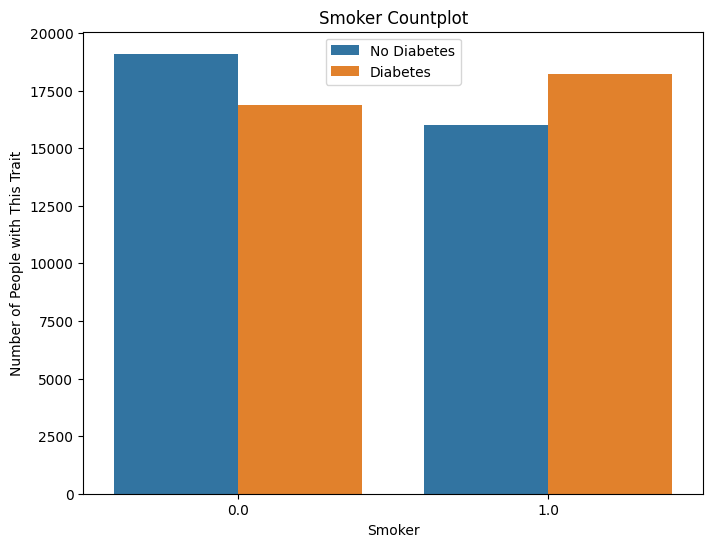

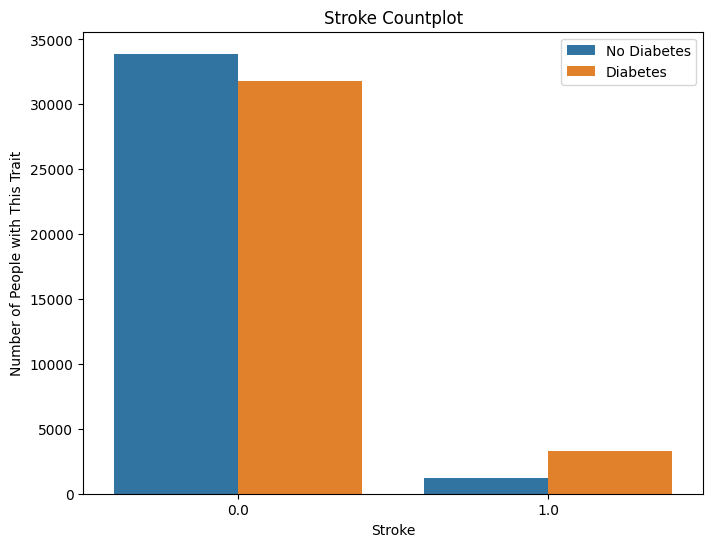

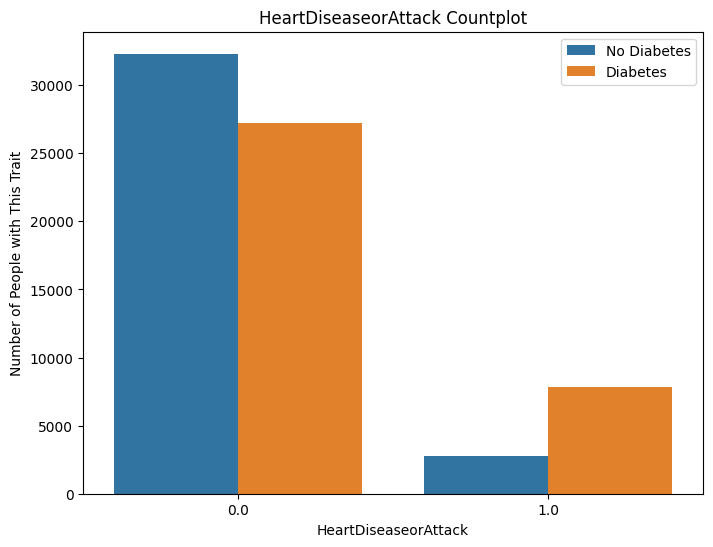

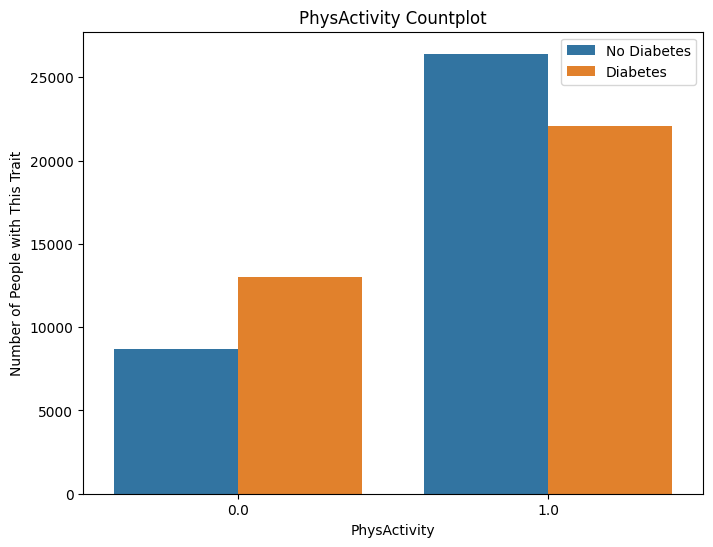

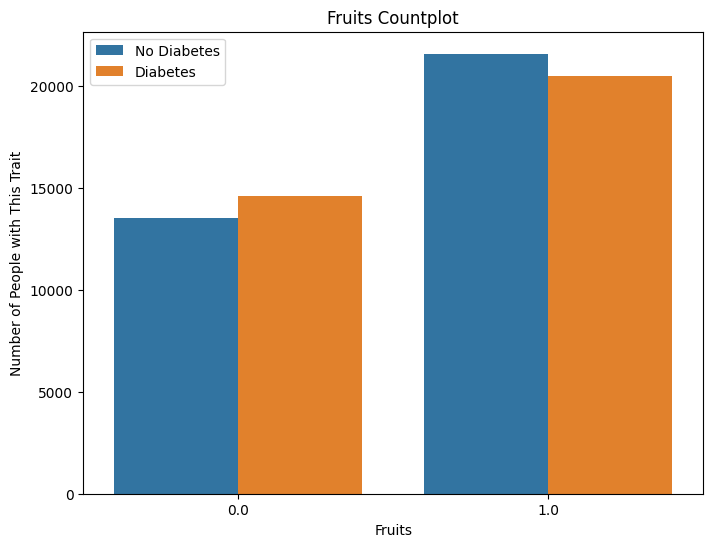

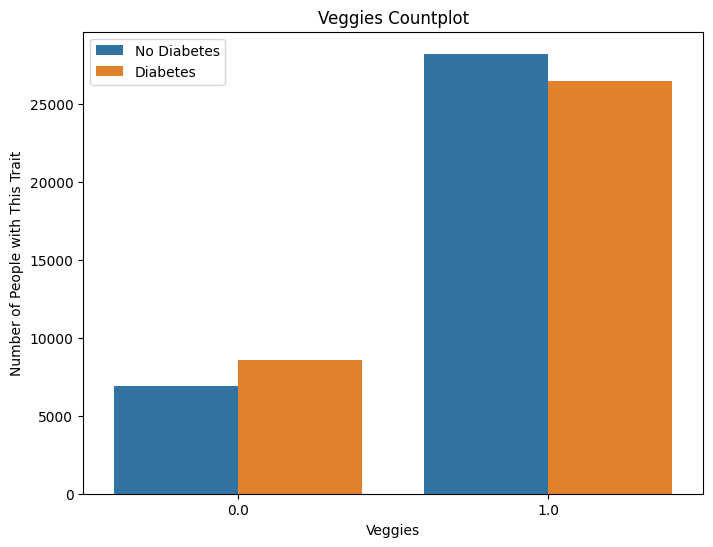

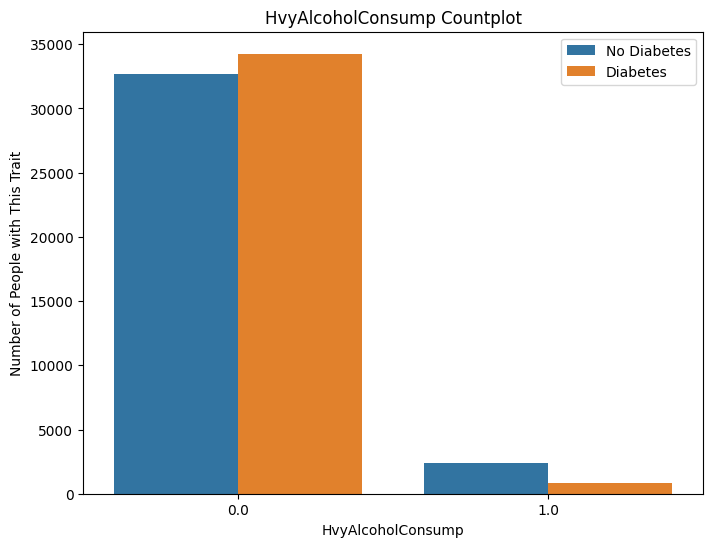

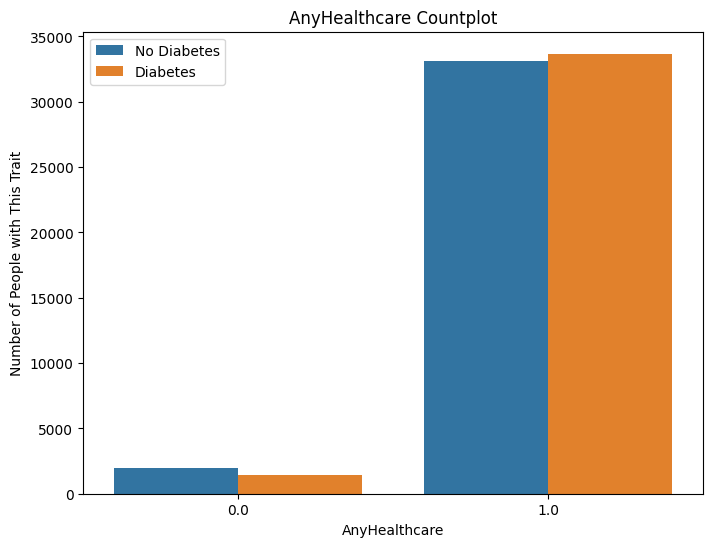

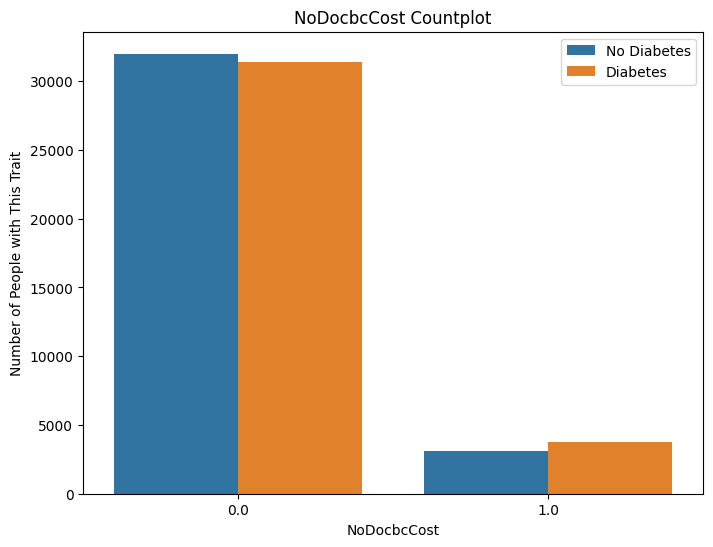

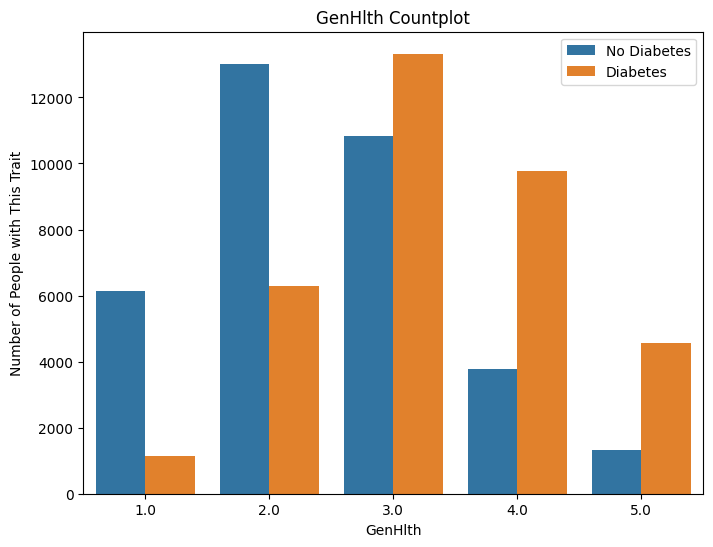

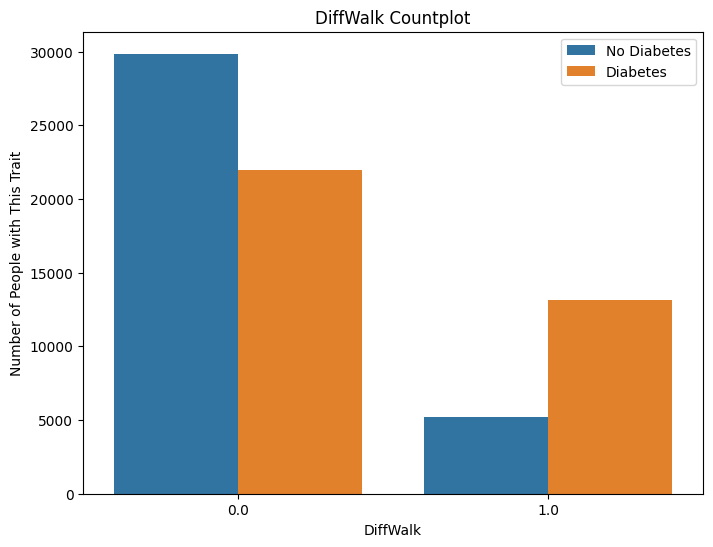

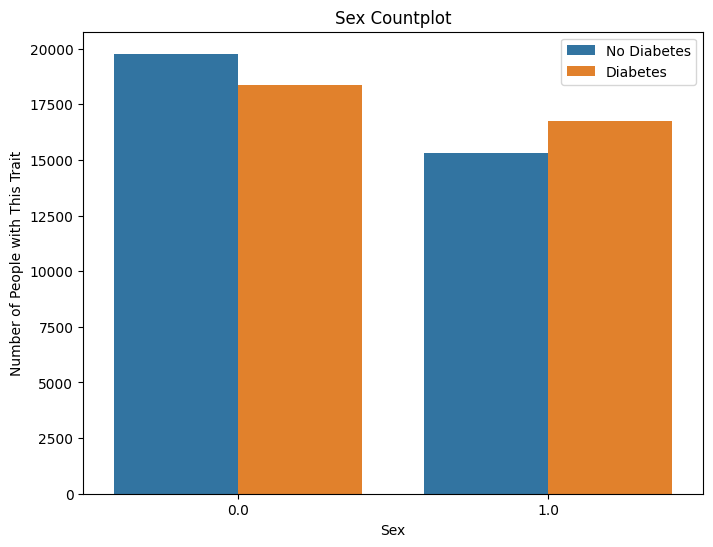

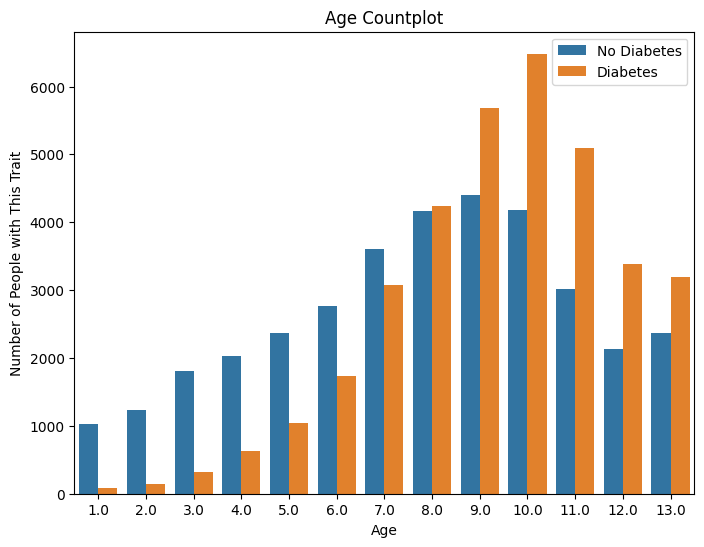

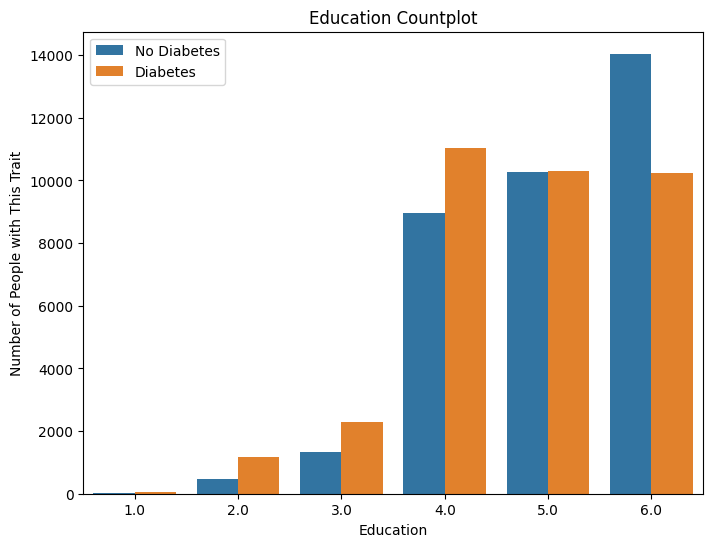

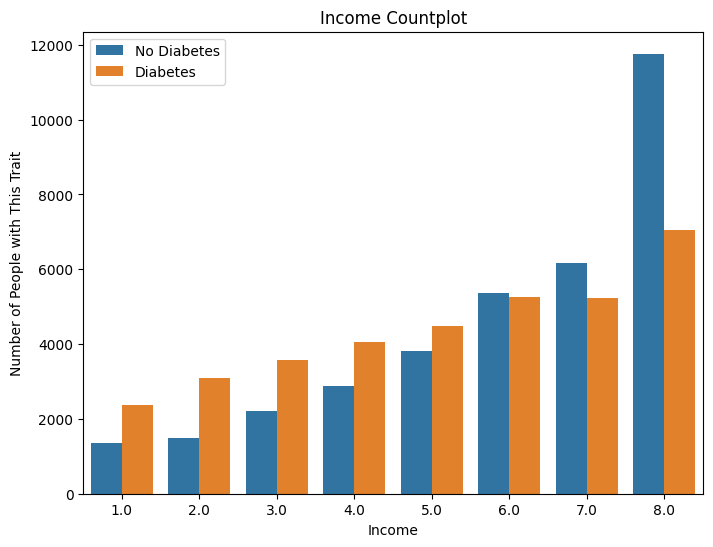

In [ ]:
for column in db.columns:
    if (column == 'Diabetes_012' or column == 'BMI' or column == 'MentHlth' or 
        column == 'PhysHlth'):
        continue
    plt.figure(figsize = (8, 6))
    sns.countplot(x = column, hue = 'Diabetes_012', data = db)
    plt.title(f'{column} Countplot')
    plt.ylabel("Number of People with This Trait")
    plt.legend(labels=['No Diabetes', 'Diabetes'])
    plt.show()

## Primary Analysis of Numerical Variables

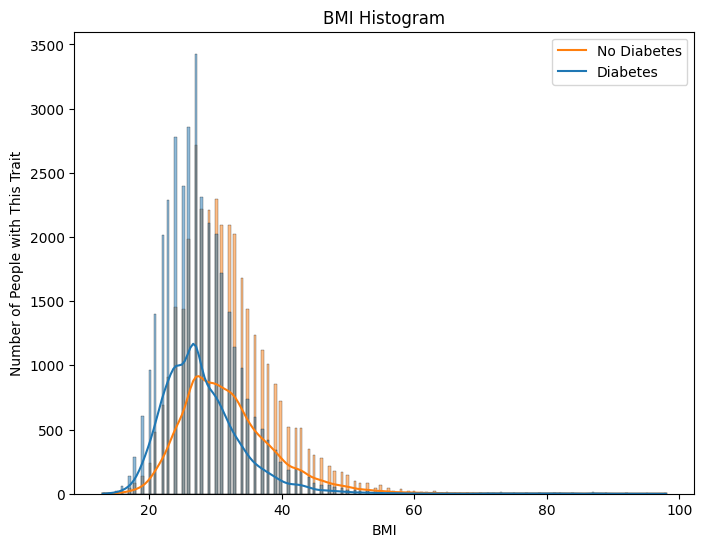

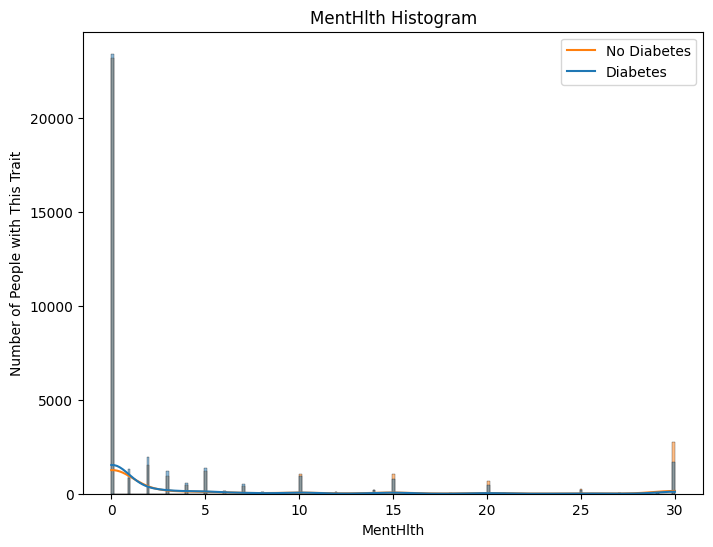

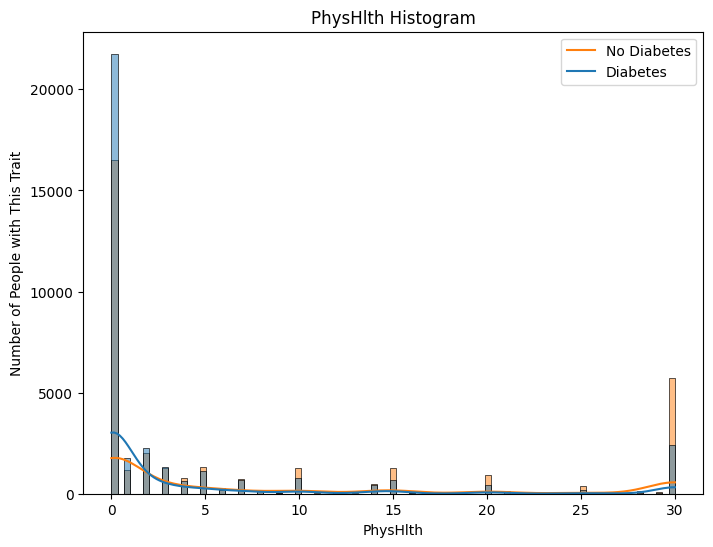

In [ ]:
for column in db.columns:
    if (column == 'BMI' or column == 'MentHlth' or column == 'PhysHlth'):
        plt.figure(figsize = (8, 6))
        sns.histplot(x = column, hue = 'Diabetes_012', data = db, kde=True)
        plt.title(f'{column} Histogram')
        plt.ylabel("Number of People with This Trait")
        plt.legend(labels=['No Diabetes', 'Diabetes'])
        plt.show()

## More Exploratory Data Analysis

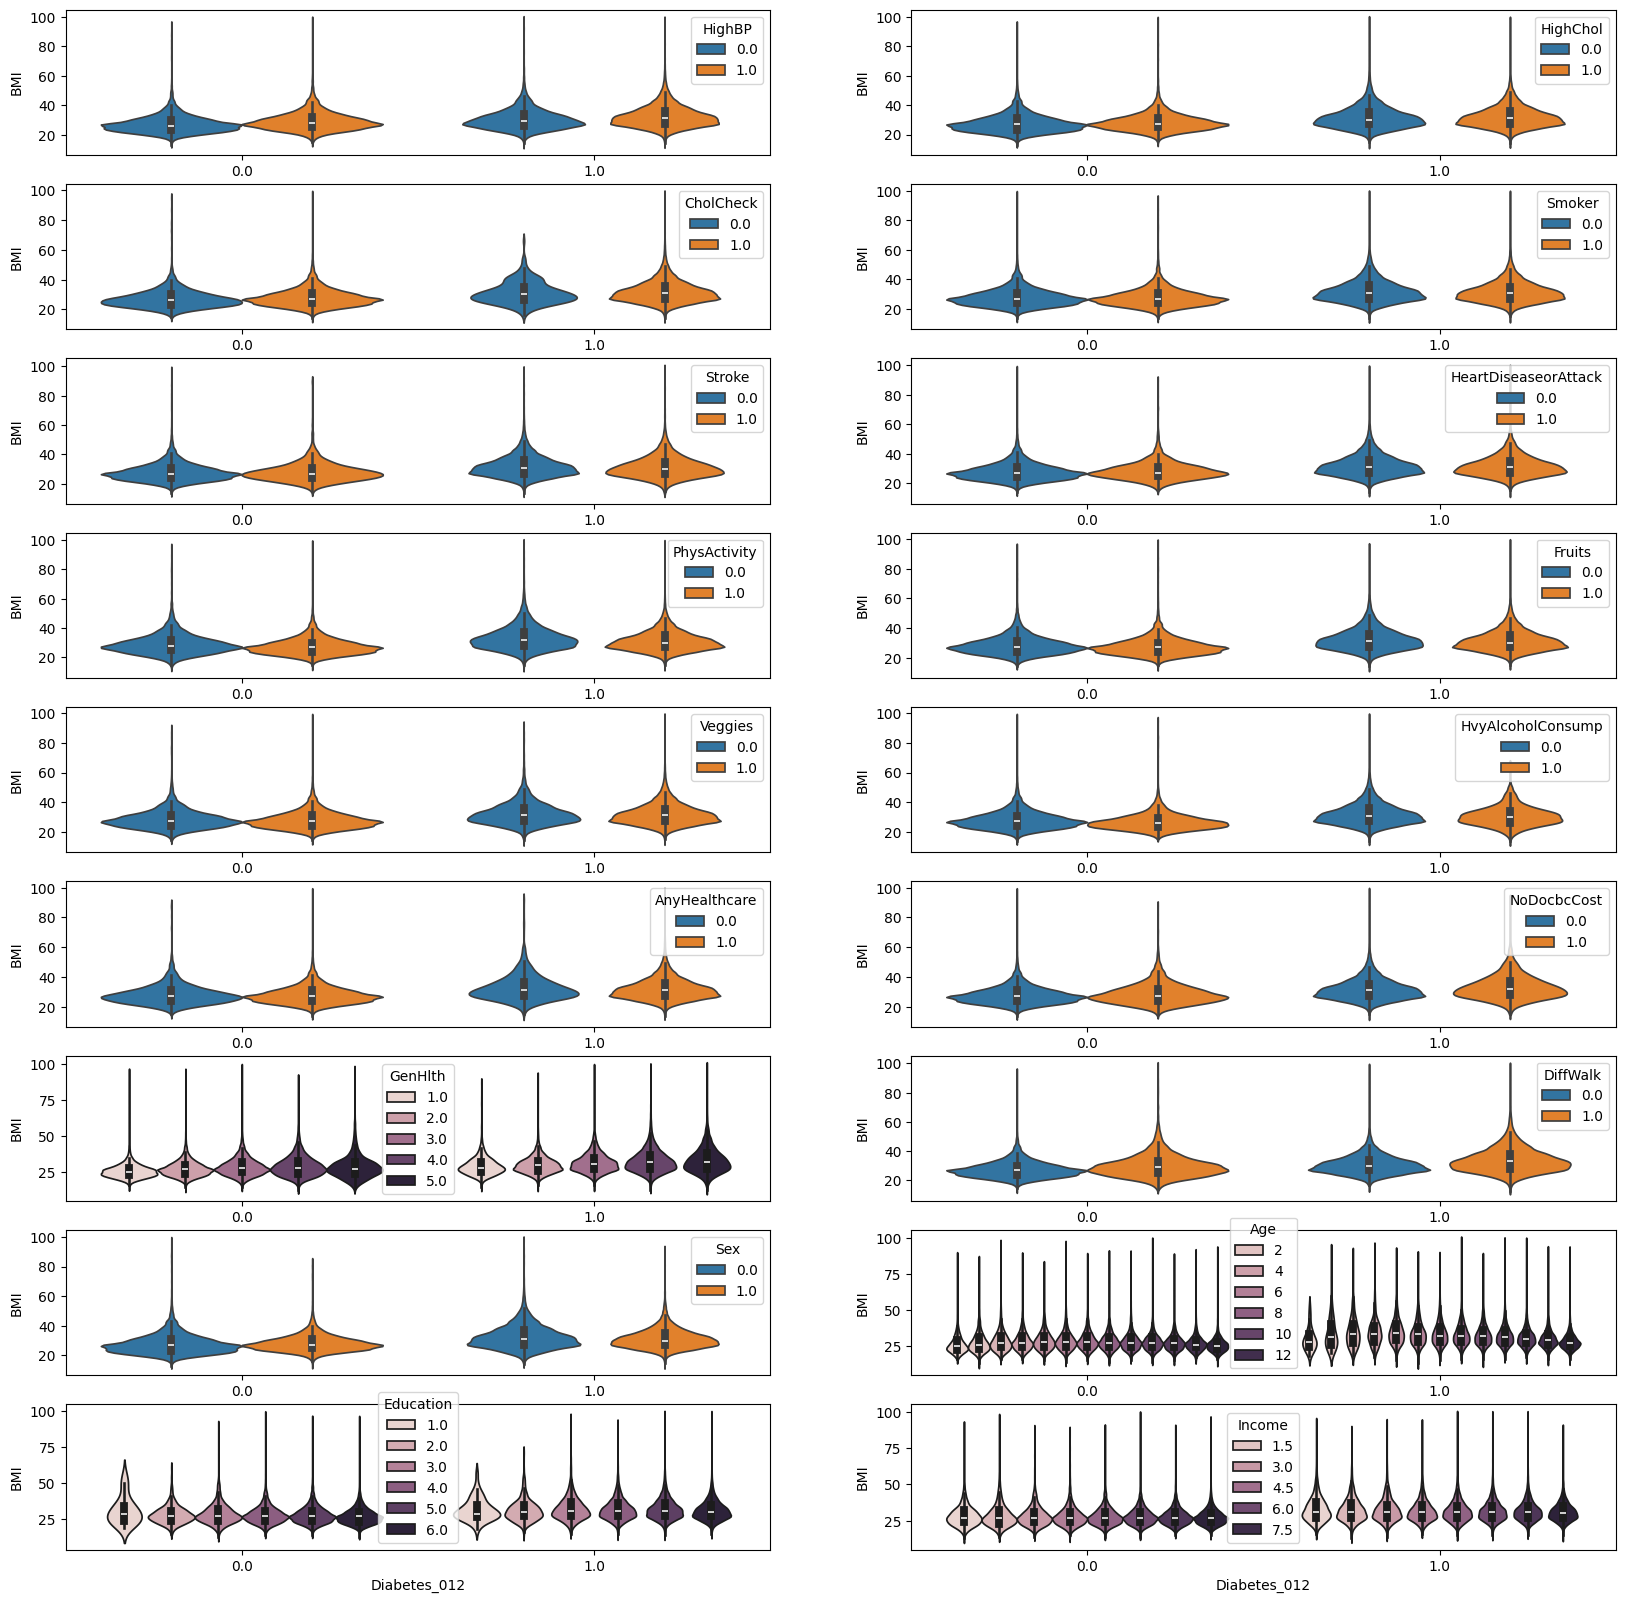

In [ ]:
db_vio = db.drop(['MentHlth', 'PhysHlth', 'BMI', 'Diabetes_012'], axis=1)

plt.figure(figsize = (20, 20))
for i, col in enumerate(db_vio.columns):
    color_by = db_vio.columns[i]
    plt.subplot(9,2,i + 1)
    sns.violinplot(x = "Diabetes_012", y = "BMI", hue = color_by, data = db)

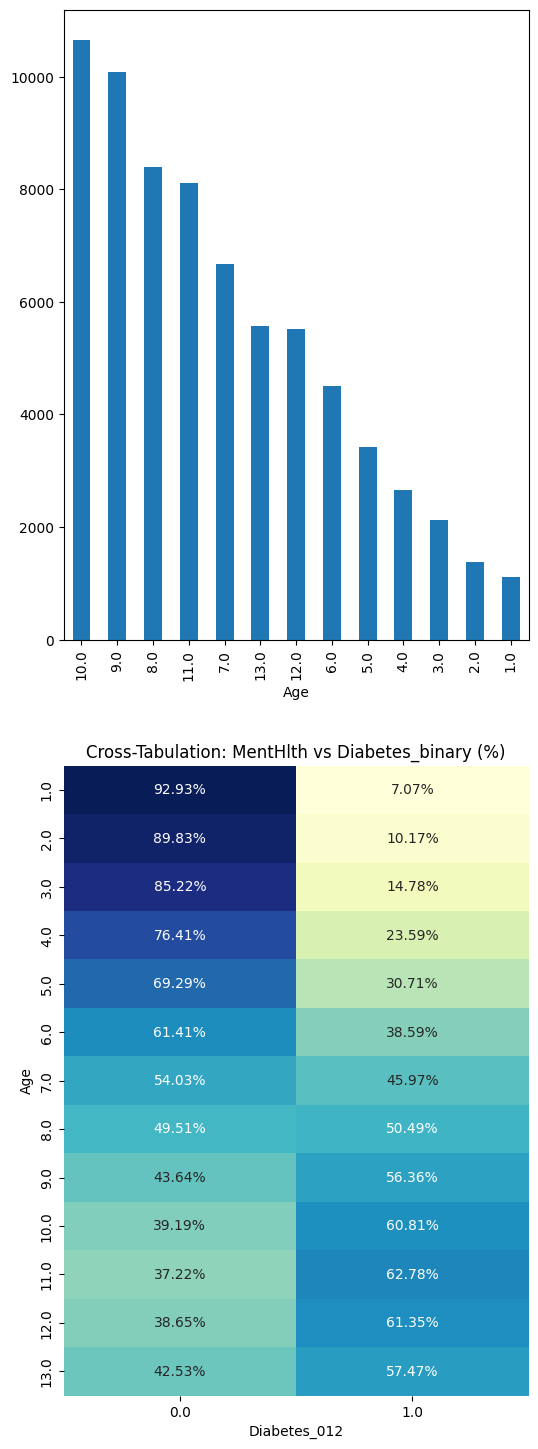

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 18))

db['Age'].value_counts().plot(kind='bar', ax=axes[0])

contingency_table = pd.crosstab(db['Age'], db['Diabetes_012'], normalize = 'index')
sns.heatmap(contingency_table, annot = True, cmap = 'YlGnBu', fmt = '0.2%', cbar = False, ax = axes[1])
axes[1].set_title(f'Cross-Tabulation: MentHlth vs Diabetes_binary (%)')

plt.show()

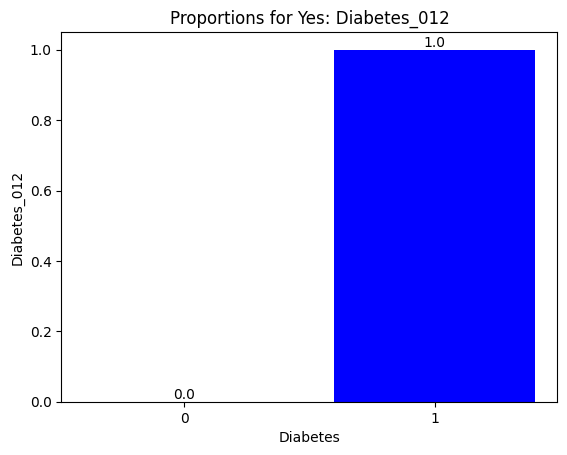

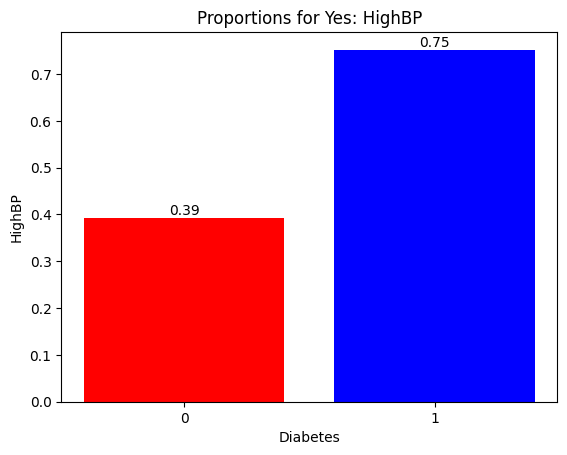

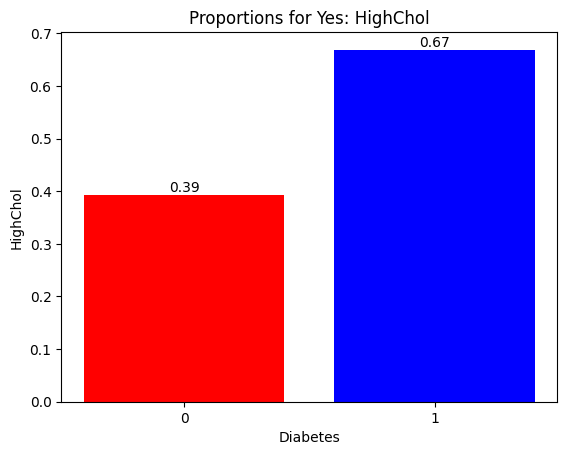

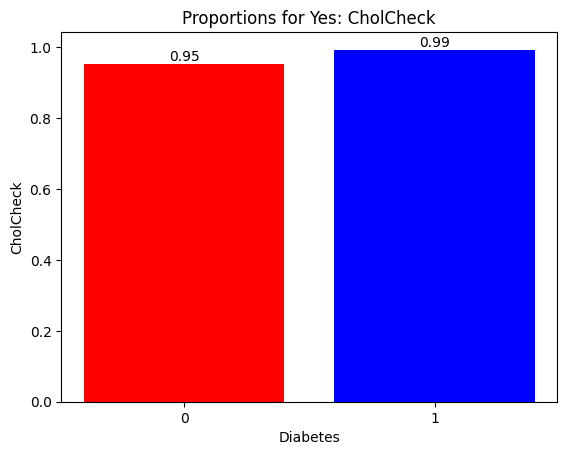

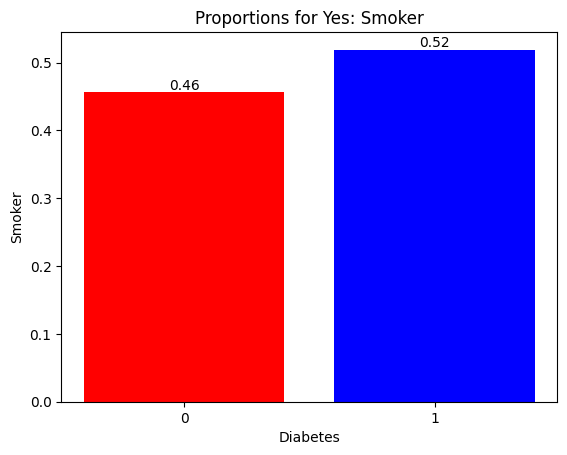

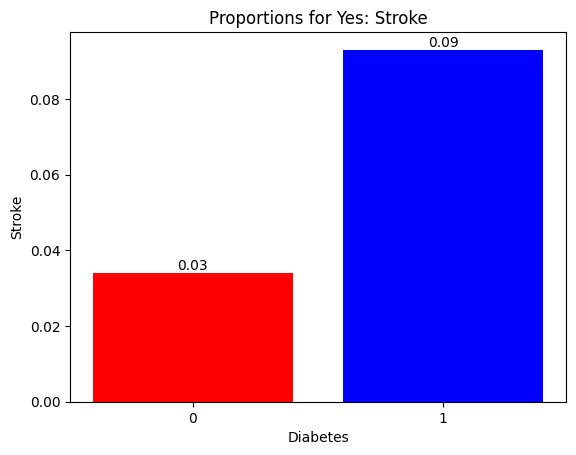

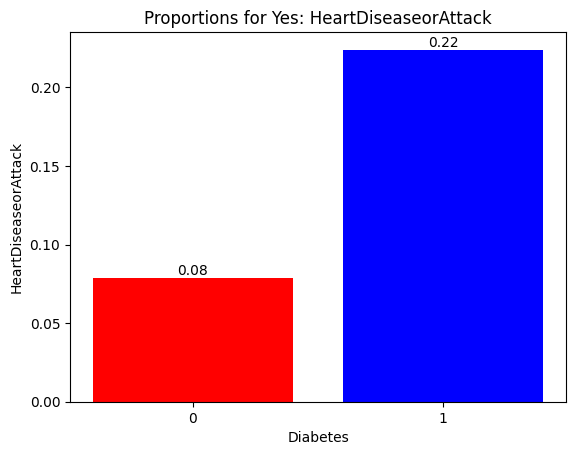

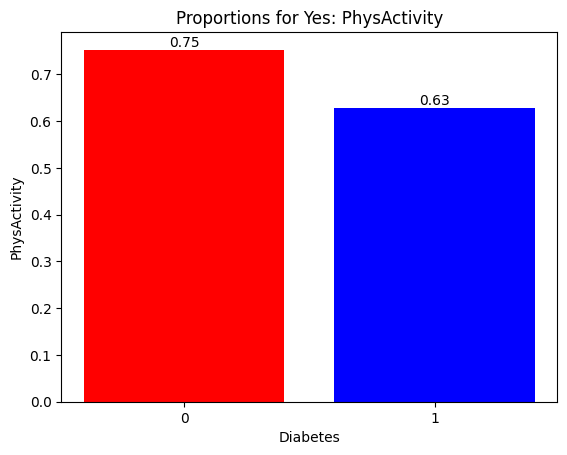

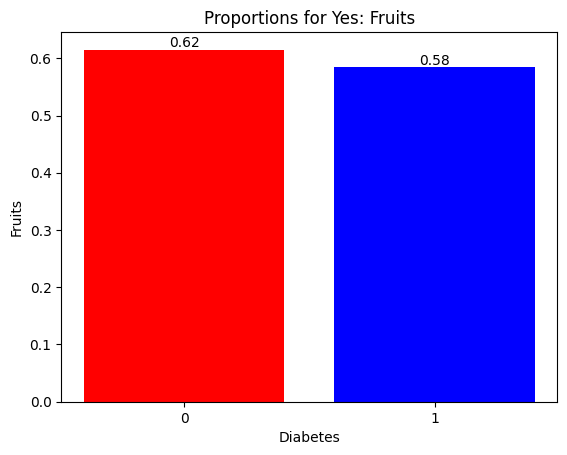

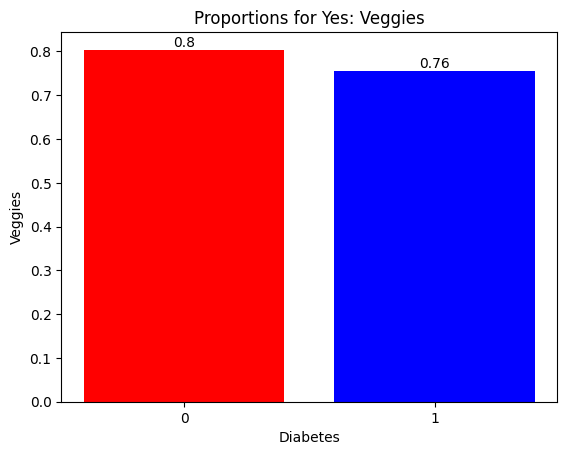

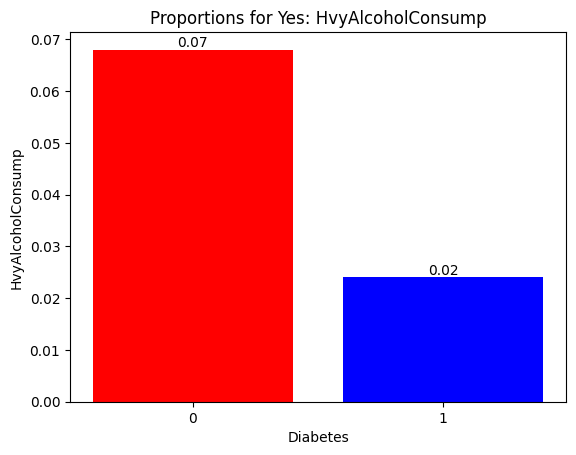

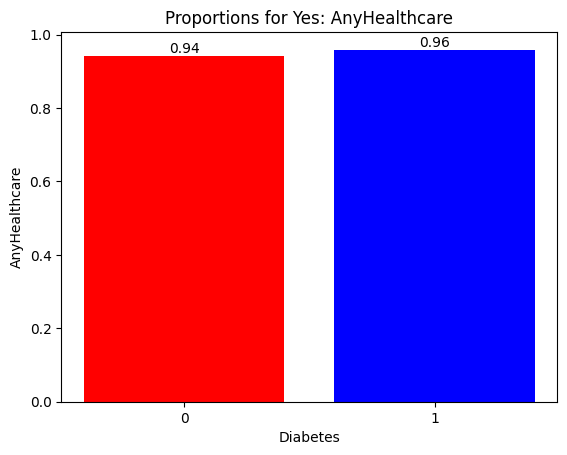

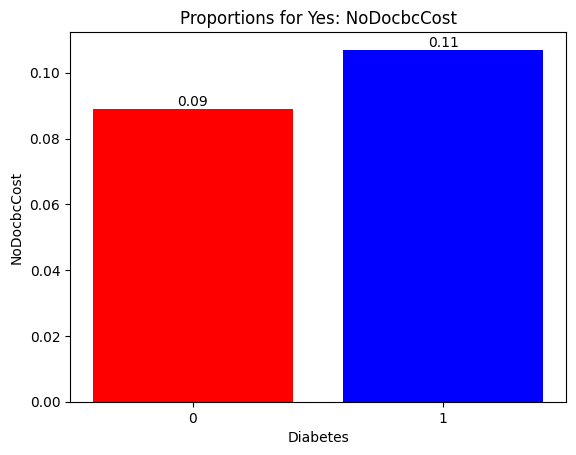

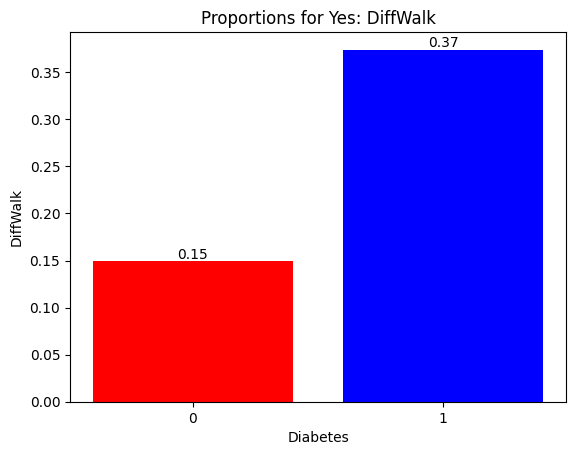

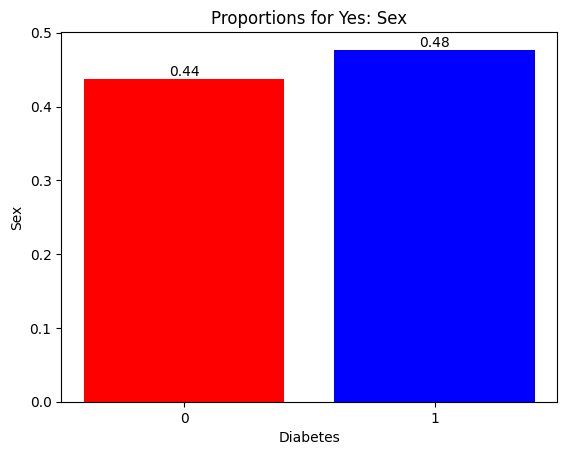

In [ ]:
diabetes = 0
db0 = db[db["Diabetes_012"] == 0]

diabetes = 1
db1 = db[db["Diabetes_012"] == 1]

# diabetes = 2
# db2 = db[db["Diabetes_012"] == 2]


bincol = []
for column in db.columns:
    uv = db[column].unique()
    if len(uv) == 2: bincol.append(column)

p0 = []
for i in bincol:
    prop_ones0 = round(db0[i].mean(), 3)
    p0.append(prop_ones0)

p1 = []
for i in bincol:
    prop_ones1 = round(db1[i].mean(), 3)
    p1.append(prop_ones1)

# p2 = []
# for i in bincol:
#     prop_ones2 = round(db2[i].mean(), 3)
#     p2.append(prop_ones2)


for i in range(0, len(bincol)):
    props = [p0[i], p1[i]]
    labs = ["0", "1"]
    plt.bar(labs, props, color=["red", "blue", "purple"])
    for j, prop in enumerate(props):
        plt.text(j, prop, str(round(prop, 2)), ha='center', va='bottom')
    plt.title(f'Proportions for Yes: {bincol[i]}')
    plt.xlabel('Diabetes')
    plt.ylabel(bincol[i])
    plt.show()

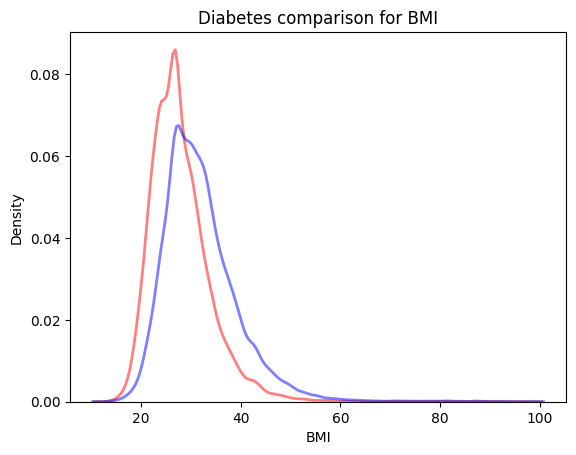

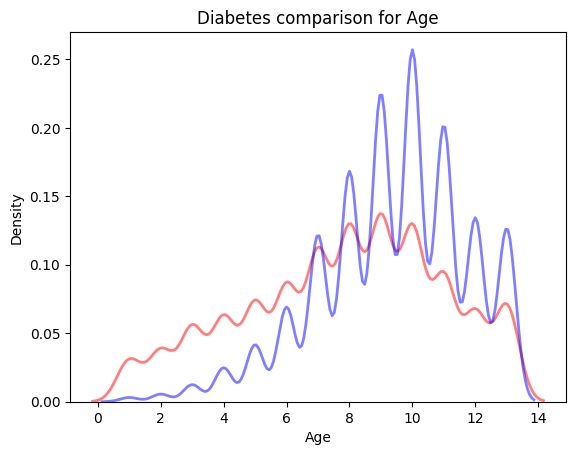

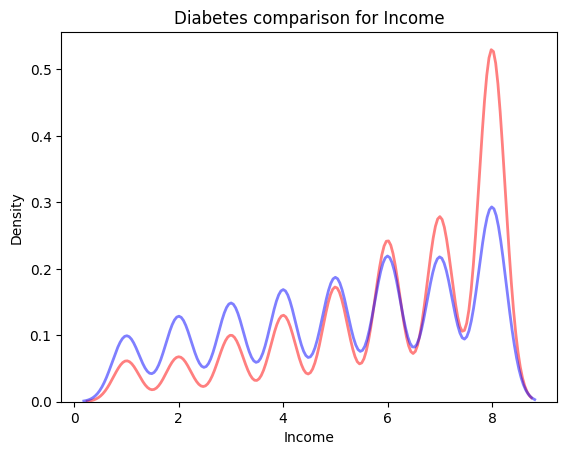

In [ ]:
nonbincol = ['BMI', 'Age', 'Income']

for i in nonbincol:
    sns.kdeplot(db0[i], color = 'red', linewidth=2, alpha=0.5)
    sns.kdeplot(db1[i], color = 'blue', linewidth=2, alpha=0.5)
    # sns.kdeplot(db2[i], color = 'purple', linewidth=2, alpha=0.5)

    plt.title(f'Diabetes comparison for {i}')
    plt.xlabel(i)
    plt.show()

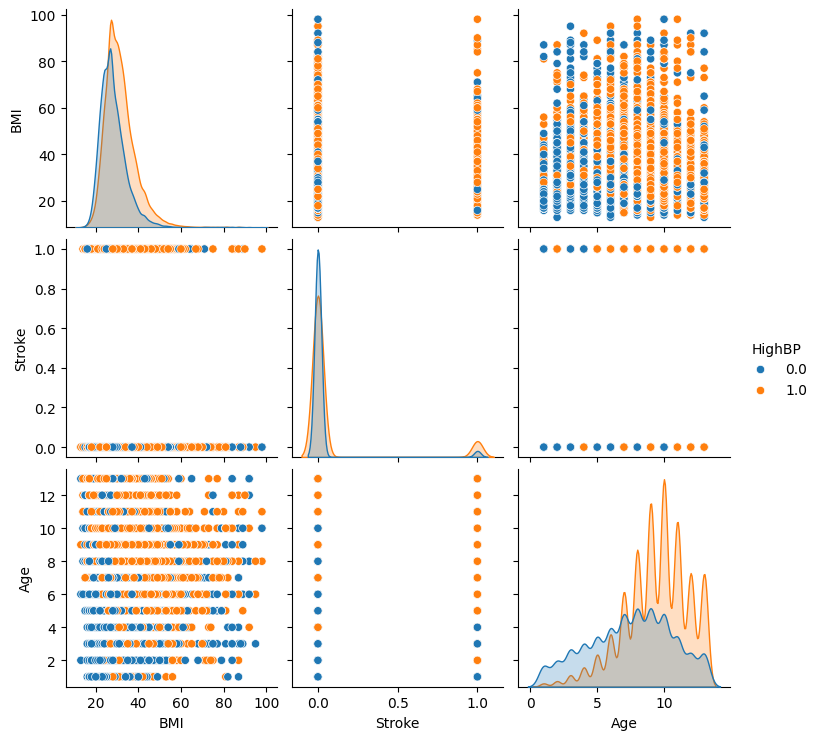

In [ ]:
sub_diab = db[['BMI', 'Stroke', 'Age', 'HighBP']]
sns.pairplot(sub_diab, hue='HighBP')

Predictors we plan on using from EDA: HighChol, HighBP, Age, BMI